In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Noisy small fractional powers near 1 have to be optimized over

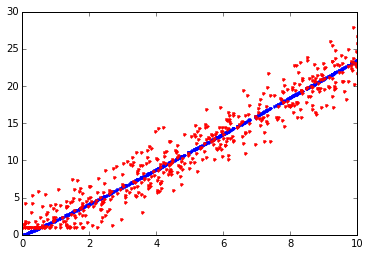

In [28]:
x = 10*rand(500)
y = 2*x**1.07
yy = np.maximum(y + 2*randn(x.shape[0]),1.01)
plot(x,y,'.')
plot(x,yy,'r.')

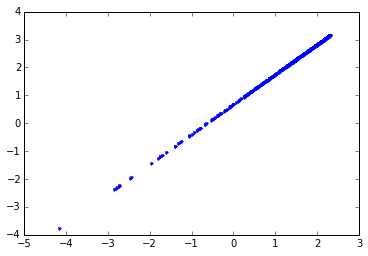

In [29]:
plot(np.log(x),np.log(y),'.')

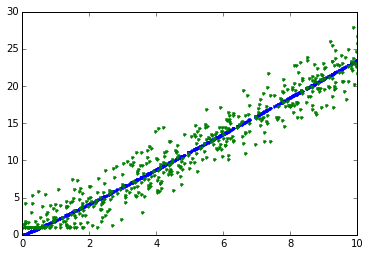

In [30]:
plot(x,y,'.',x,yy,'.')

In [31]:
from scipy import  optimize
foo=lambda a: np.linalg.norm(yy-a[0]*x**a[1])**2
sol=optimize.fmin(foo,(1,1))
print sol

Optimization terminated successfully.
         Current function value: 1846.899528
         Iterations: 53
         Function evaluations: 99
[ 2.0674534   1.05230907]


## Piecewise functions inference

(0.0, 10.0, -0.1, 1.1)

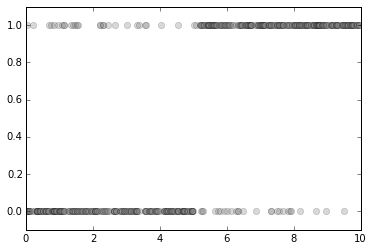

In [32]:
import itertools as it
import numpy as np
v = .9

@np.vectorize
def gen_y(x):
    if x<5:
        return np.random.choice([0,1],p=[v,1-v]) 
    else:
        return np.random.choice([0,1],p=[1-v,v])

xi = np.sort(np.random.rand(500)*10)
yi = gen_y(xi)
plot(xi,yi,'o',color='gray',alpha=.3)
axis(ymax=1.1,ymin=-0.1)

(0.0, 10.0, -0.1, 1.1)

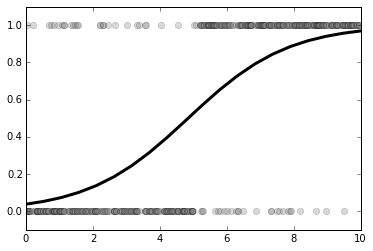

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(c_[xi],yi)
plot(np.linspace(0,10,20),lr.predict_proba(c_[np.linspace(0,10,20)])[:,1],'k-',lw=3)
plot(xi,yi,'o',color='gray',alpha=.3)
axis(ymax=1.1,ymin=-0.1)

In [34]:
from sklearn.datasets import make_classification

## Check imbalances

0.8545454545454545

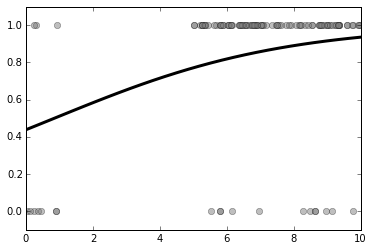

In [35]:
xi = np.random.rand(100)*5+5
xi = np.hstack([xi,np.random.rand(10)])
yi = gen_y(xi)
plot(xi,yi,'o',color='gray',alpha=.3)
# lr = LogisticRegression(class_weight={0: .90, 1: .1})
# lr = LogisticRegression(class_weight='auto')
lr = LogisticRegression()

lr.fit(c_[xi],yi)

xii = np.linspace(xi.min(),xi.max(),30)
plot(xii,lr.predict_proba(c_[xii])[:,1],'k-',lw=3)
plot(xi,yi,'o',color='gray',alpha=.3)
axis(ymax=1.1,ymin=-0.1,xmin=0,xmax=10)

lr.score(c_[xi],yi)

## discussion for probabilities close to decision boundary

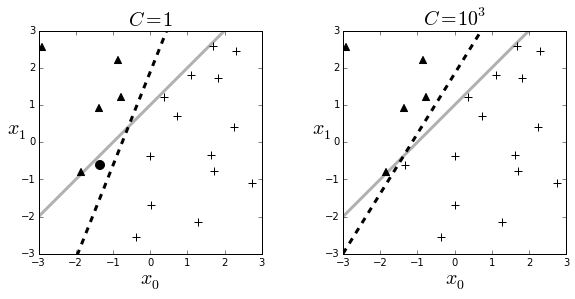

In [37]:
# consider two-dimensional plane
np.random.seed(1234)

fig,axs=subplots(1,2)
ax=axs[0]
fig.set_size_inches((10,4))

x0,x1=np.random.rand(2,20)*6-3
# assign decision boundary
beta = np.array([1,-1,1]) # last coordinate for affine offset
# ax.scatter(x0,x1,50,color='gray',alpha=.3)
xi =np.linspace(-3,3,10)
ax.plot(xi,-beta[0]/beta[1]*xi-beta[2]/beta[1],
        lw=3,label='True',color='k',alpha=.3)
# ax.grid() 
 
X = c_[x0,x1,x1*0+1]
prd=(X).dot(beta)
probs=1/(1+exp(-prd/np.linalg.norm(beta)))
label = prd>0
ax.scatter(x0[prd>0],x1[prd>0],50,color='k',marker='+')
ax.scatter(x0[prd<0],x1[prd<0],50,color='k',marker='^')

proj=np.eye(3)-np.outer(beta,beta)/np.linalg.norm(beta)**2

# xtmp,ytmp,_=(proj.dot(X.T))
# ax.scatter(xtmp,ytmp)

# lr = LogisticRegression(C=150000)
lr = LogisticRegression()
lr.fit(X[:,:-1],label)
betah = r_[lr.coef_.flat,lr.intercept_]
ax.plot(xi,-betah[0]/betah[1]*xi -betah[2]/betah[1],lw=3,ls='--',
        color='k',label='Fitted')
ax.set_aspect(1/2)

i,=where(lr.predict(X[:,:-1])-label.astype(int))
ax.scatter(X[i,0],X[i,1],80,color='k')
ax.axis((-3,3,-3,3))
ax.set_aspect(1)
# ax.legend(loc=(1,0))
ax.set_xlabel('$x_0$',fontsize=20)
ax.set_ylabel('$x_1$',fontsize=20,rotation='horizontal')
ax.set_title('$C=1$',fontsize=20)

# consider two-dimensional plane
ax=axs[1]
ax.plot(xi,-beta[0]/beta[1]*xi-beta[2]/beta[1],
        lw=3,label='True',color='k',alpha=.3)
ax.scatter(x0[label],x1[label],50,color='k',marker='+')
ax.scatter(x0[~label],x1[~label],50,color='k',marker='^')

lr = LogisticRegression(C=1000.)
lr.fit(X[:,:-1],label)
betah = r_[lr.coef_.flat,lr.intercept_]

ax.plot(xi,-betah[0]/betah[1]*xi -betah[2]/betah[1],lw=3,ls='--',
        color='k',label='Fitted')
ax.set_aspect(1/2)

i,=where(lr.predict(X[:,:-1])-label.astype(int))
ax.scatter(X[i,0],X[i,1],80,color='k')
ax.axis((-3,3,-3,3))
ax.set_aspect(1)
ax.set_xlabel('$x_0$',fontsize=20)
ax.set_ylabel('$x_1$',fontsize=20,rotation='horizontal')
ax.set_title('$C=10^3$',fontsize=20)

fig.savefig('../fig-machine_learning/logreg_004.png')

## Assign probabilities at random according to inverse  logit

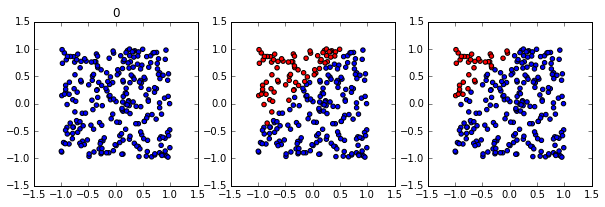

In [24]:
# np.random.seed(12345)
fig,axs=subplots(1,3)

fig.set_size_inches((10,10))
ax=axs[0]
ax.set_aspect(1)

x0,x1=np.random.rand(2,250)*2-1
X = c_[x0,x1,x1*0+1]

lr = LogisticRegression()

beta = np.array([1,-1,0.01]) # last coordinate for affine offset
prd=(X).dot(beta)
probs=1/(1+exp(-prd/np.linalg.norm(beta)))
label = (probs > np.random.rand())
ax.scatter(x0,x1,c=map(lambda i:'b' if i else 'r',label))
ax.set_title('0')

ax=axs[1]
beta = 10*np.array([1,-1,0.01]) # last coordinate for affine offset
prd=(X).dot(beta)
probs=1/(1+exp(-prd/np.linalg.norm(beta)))
label = (probs > np.random.rand())
ax.scatter(x0,x1,c=map(lambda i:'b' if i else 'r',label))
ax.set_aspect(1)

ax=axs[2]
beta = 100*np.array([1,-1,0.01]) # last coordinate for affine offset
prd=(X).dot(beta)
probs=1/(1+exp(-prd/np.linalg.norm(beta)))
label = (probs > np.random.rand())
ax.scatter(x0,x1,c=map(lambda i:'b' if i else 'r',label))
ax.set_aspect(1)

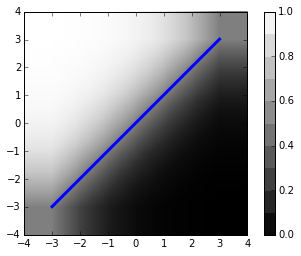

In [25]:
from matplotlib.image import NonUniformImage

fig,ax=subplots()
ax.set_aspect(1)
xi =np.linspace(-3,3,10)

beta = 1*np.array([1,-1,0.01]) # last coordinate for affine offset

Xx,Yy=mgrid[-3:3:30j,-3:3:20j]
z=dstack([Xx,Yy,Yy*0+1]).dot(beta)
probs=1/(1+exp(z))

# tmp=ax.pcolor(Xx,Yy,z,cmap=cm.gray)
ax.plot(xi,-beta[0]/beta[1]*xi-beta[2]/beta[1],lw=3,label='true')
# colorbar(tmp)

im = NonUniformImage(ax,interpolation='bilinear',extent=(-3,3,-3,3),
                     cmap=cm.gray)
im.set_data(Xx[:,0],Yy[0,:],probs.T)
ax.images.append(im)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
cb=fig.colorbar(im,boundaries=linspace(0,1,11))
cb.set_clim(0, 1)

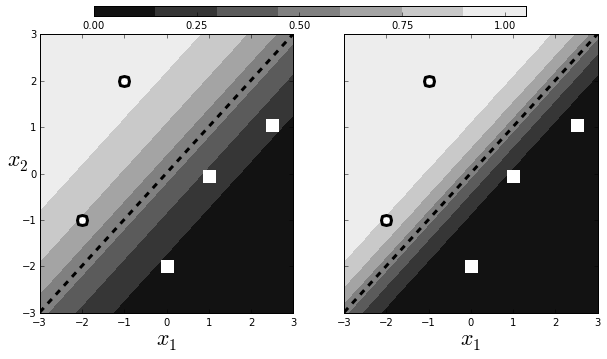

In [26]:
fig,axs=subplots(1,2,sharex=True,sharey=True)
fig.set_size_inches((10,5))

beta = np.array([1,-1,0.01]) # last coordinate for affine offset
z=dstack([Xx,Yy,Yy*0+1]).dot(beta)
probs=1/(1+exp(z))
         
ax=axs[0]
# ax.set_aspect(1)
ax.plot(xi,-beta[0]/beta[1]*xi-beta[2]/beta[1],'--k',lw=3,label='true')

im=ax.contourf(Xx,Yy,probs,cmap=cm.gray)
# cb=fig.colorbar(im,ticks=linspace(0,1,5))
X = c_[array([-2,-1,0,1,2.5]),array([-1,2,-2,-0.05,1.05])]

# some fake data for example
ax.plot(X[:2,0],X[:2,1],'o',color='white',mec='k',ms=10,mew=3)
ax.plot(X[2:,0],X[2:,1],'s',color='white',mec='w',ms=10,mew=3)

ax=axs[1]
# ax.set_aspect(1)
beta = beta*2
ax.plot(xi,-beta[0]/beta[1]*xi-beta[2]/beta[1],'--k',lw=3,label='true')

ax.plot(X[:2,0],X[:2,1],'o',color='white',mec='k',ms=10,mew=3)
ax.plot(X[2:,0],X[2:,1],'s',color='white',mec='w',ms=10,mew=3)

z=dstack([Xx,Yy,Yy*0+1]).dot(beta)
probs=1/(1+exp(z))
im=ax.contourf(Xx,Yy,probs,cmap=cm.gray)
# ax.plot(X[:,0],X[:,1],'o',color='white',mec='k',ms=10,mew=3)

cbaxes = fig.add_axes([0.2, .95, 0.6, 0.08/3]) 
cb = fig.colorbar(im,cax=cbaxes,orientation='horizontal',
                  ticks=linspace(0,1,5)) 

axs[0].set_xlabel('$x_1$',fontsize=22)
axs[1].set_xlabel('$x_1$',fontsize=22)
axs[0].set_ylabel('$x_2$',fontsize=22,rotation='horizontal')
fig.savefig('../fig-machine_learning/logreg_003.png')